In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error

## Question 3:

References:  
1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  I have used this refference to know the parameters used in PCA function 
2. https://stackoverflow.com/questions/64823789/issue-in-finding-rmse-in-pca-reconstruction-in-python I have used this reffernce to know, how to claculate mse for all dimensions

In [ ]:
df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv')# Reading the data file
df.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


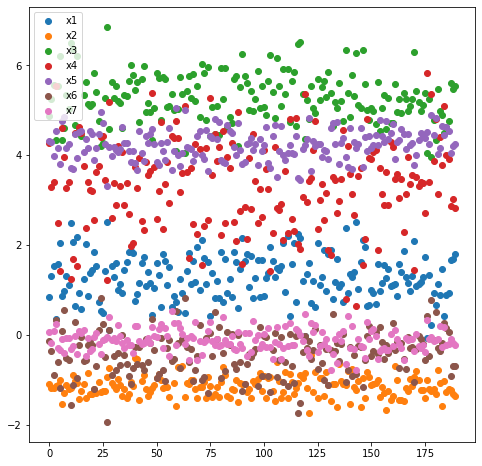

In [ ]:
'''
(a) Data visualization
'''
x = np.arange(0,df.shape[0],1)
plt.figure(figsize=(8, 8))
for i in range(df.shape[1]):
  p = str(i+1)
  plt.scatter(x,df.iloc[:,i],label= 'x'+p) # Data visualization using scatter plot
  plt.legend()


In [ ]:
'''
(b) PCA training
'''
scaler = StandardScaler()  # Scalling of dataset using standardscaler
df_scaled = scaler.fit_transform(df) 
pca = PCA()
df_pca = pca.fit_transform(df_scaled) # PCA training


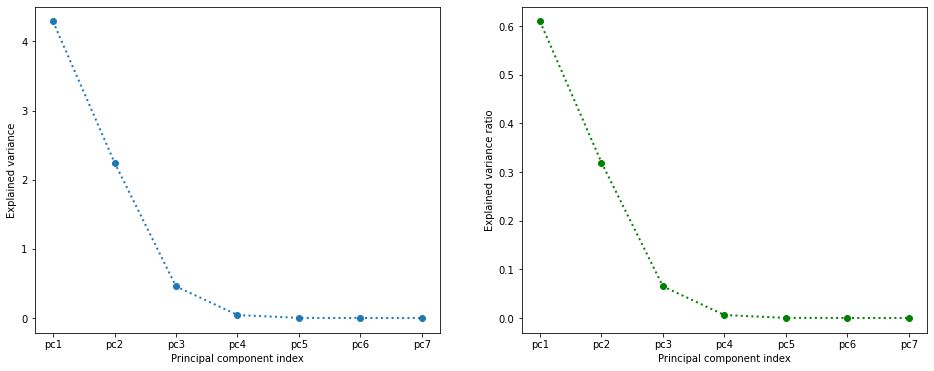

In [ ]:
'''
(c) Plot of the variance explained versus PCA dimensions
'''
exp_var_pca = pca.explained_variance_  # to find explained variance
exp_var_ratio_pca = pca.explained_variance_ratio_
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 6
labels = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7']
plt.subplot(121)
plt.plot(range(0,len(exp_var_pca)), exp_var_pca, marker = "o",linestyle='dotted',  linewidth=2) # plot of the variance explained versus PCA dimensions
plt.xticks(range(0,len(exp_var_pca)), labels, rotation ='horizontal')
plt.ylabel('Explained variance')
plt.xlabel('Principal component index')
plt.subplot(122)
plt.plot(range(0,len(exp_var_ratio_pca)), exp_var_ratio_pca, color = 'green', marker = "o",linestyle='dotted',  linewidth=2) # plot of the variance explained ratio versus PCA dimensions
plt.xticks(range(0,len(exp_var_ratio_pca)), labels, rotation ='horizontal')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

In [ ]:
'''
(d) Reconstruction of the data and computation of MSE with various numbers of PCA dimensions
'''
components = [2,3,4,5,6,7]    #various numbers of PCA dimensions 
for n in components:
    pca = PCA(n_components=n)
    df_recon = pca.inverse_transform(pca.fit_transform(df)) # Reconstruction of data for all PCA dimensions
    mse = mean_squared_error(df, df_recon,squared=True)     # mse for reconstructed data
    print("MSE = {} with {} components".format(mse, n))

MSE = 0.011187737930647788 with 2 components
MSE = 0.0019326899390266067 with 3 components
MSE = 3.028954394737666e-05 with 4 components
MSE = 4.97227083328048e-06 with 5 components
MSE = 4.867173130666698e-07 with 6 components
MSE = 1.1408884253606844e-31 with 7 components


###OBSERVATIONS:
From part (c) we can see that the total proportion variance explained by pc1,pc2 and pc3 is about 99.32% and also elbow is at pc3. From part (d) we can see that mse is very small and  not changing significantly for more than 3 principal components. So principal component = 3 can be used in pca without any significant error.